In [77]:
#Testing DSA OCR service features
import girder_client
import ocr
import PIL
from PIL import Image
import requests
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
gc=girder_client.GirderClient(apiUrl="http://transplant.digitalslidearchive.emory.edu:8080/api/v1")

In [3]:
gc.authenticate(interactive=True)

Login or email: admin
Password for admin: ········


In [ ]:
## 5cb8e68ae629140067608a4c
## Folders

IDS_to_Process = []

alreadyHadDataMatrix = 0
batchSize = 10

for i in list(gc.listItem('5cb8e6d9e629140067608d06')):
    if ('meta' in i):
        if ('dataMatrixOutput' in i['meta']):
            alreadyHadDataMatrix+=1
            #print ("Meta Tag alraedy exists")
    
    else:
        IDS_to_Process.append(i['_id'])
        if(len(IDS_to_Process)%batchSize == 0):
            print("You have a batch of %s"%batchSize)
            print(IDS_to_Process)
            labelUpdateUrl = "http://0.0.0.0:5000/label?ids=%s" % ( ",".join(IDS_to_Process))
            print(labelUpdateUrl)
            requests.get(labelUpdateUrl)
            IDS_to_Process = [] ### Reset the cache


## Don't forget to process the last batch
labelUpdateUrl = "http://0.0.0.0:5000/label?ids=%s" % ( ",".join(IDS_to_Process))
print(labelUpdateUrl)
requests.get(labelUpdateUrl)

print(alreadyHadDataMatrix,"Had a data matrix alraedy")
    
    
    

You have a batch of 10
['5cb8e700e629140067608e29', '5cb8e6d9e629140067608d07', '5cb8e728e629140067608f79', '5cb8e710e629140067608eb7', '5cb8e74de629140067609073', '5cb8e742e62914006760903a', '5cb8e72be629140067608f91', '5cb8e751e62914006760908b', '5cb8e723e629140067608f4c', '5cb8e70ce629140067608e94']
http://0.0.0.0:5000/label?ids=5cb8e700e629140067608e29,5cb8e6d9e629140067608d07,5cb8e728e629140067608f79,5cb8e710e629140067608eb7,5cb8e74de629140067609073,5cb8e742e62914006760903a,5cb8e72be629140067608f91,5cb8e751e62914006760908b,5cb8e723e629140067608f4c,5cb8e70ce629140067608e94


['5cb8e646e62914006760879d', '5cb8e698e629140067608ae0', '5cb8e64be6291400676087d2', '5cb8e68de629140067608a67', '5cb8e66ae6291400676088f1', '5cb8e68fe629140067608a81', '5cb8e61ce6291400676085ff', '5cb8e690e629140067608a85', '5cb8e6d1e629140067608ccb', '5cb8e64fe6291400676087fc', '5cb8e6b5e629140067608be3']
http://0.0.0.0:5000/label?ids=5cb8e646e62914006760879d,5cb8e698e629140067608ae0,5cb8e64be6291400676087d2,5cb8e68de629140067608a67,5cb8e66ae6291400676088f1,5cb8e68fe629140067608a81,5cb8e61ce6291400676085ff,5cb8e690e629140067608a85,5cb8e6d1e629140067608ccb,5cb8e64fe6291400676087fc,5cb8e6b5e629140067608be3


<Response [200]>

In [91]:
print("http://0.0.0.0:5000/label?ids=%s" % ( ",".join(IDS_to_Process)))

http://0.0.0.0:5000/label?ids=5cb8e68ae629140067608a4c,5cb8e678e629140067608971,5cb8e692e629140067608a9d,5cb8e679e62914006760897b,5cb8e680e6291400676089d6


In [74]:
#curl -X GET --header 'Accept: image/jpeg' --header 'Girder-Token: GOL44tmAFOVRBzzBJApVRrfUh87CQkh7CGPuvsBwSnmUHsrWQoig4PjUPzSCmL4H' 'http://transplant.digitalslidearchive.emory.edu:8080/api/v1/'
labelImg = gc.get('item/%s/tiles/images/label?encoding=JPEG'%i['_id'],jsonResp=False)

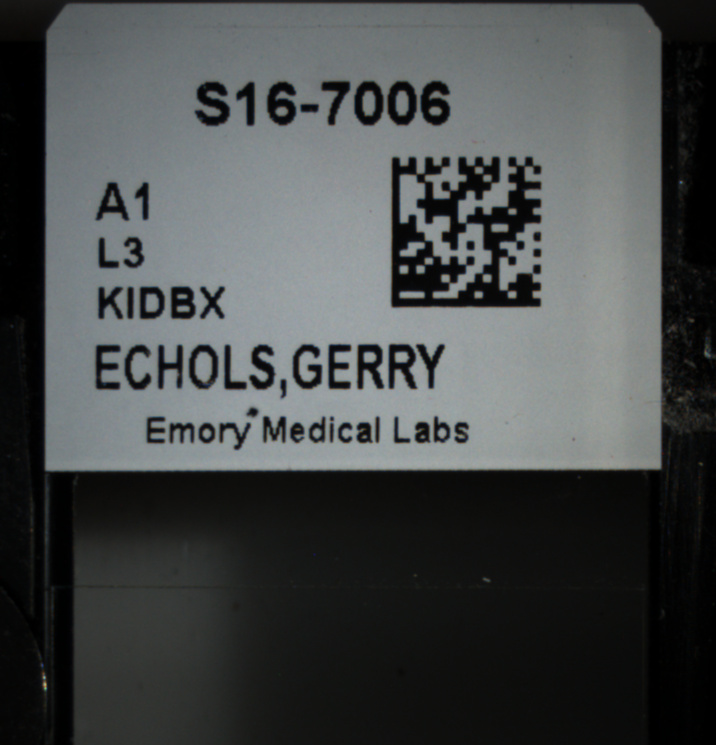

In [75]:
from IPython.display import Image as IPImage
IPImage(labelImg.content)

745 716 3
35 572 0 409
$16-7006

Al
L3 :
KIDBX

ECHOLS,GERRY


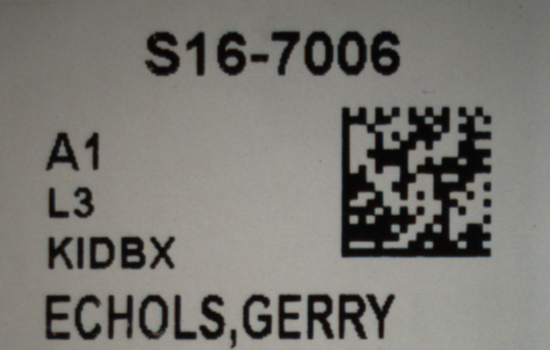

In [76]:
import numpy as np
from PIL import Image
import numpy as np

import cv2


img_array = np.frombuffer(labelImg.content, dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)


procImg = img
#cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

(h,w,d) = procImg.shape
wStart = int(w*0.05)
wEnd = int(w*0.8)
hStart = int(h*0)
hEnd = int(h*0.55)

print(h,w,d)
procImg = procImg[50:400,50:600,]

print(wStart,wEnd,hStart,hEnd)

result = ocr.pytesseract.image_to_string(procImg)
print(result)

Image.fromarray(procImg)



In [36]:
ocr.basic_ocr(image)

ECHOLS.GERRY [Decoded(data=b'S16-7006;S1;EMYO', rect=Rect(left=390, top=438, width=150, height=151))]


('ECHOLS.GERRY',
 'ECHOLS.GERRY',
 [Decoded(data=b'S16-7006;S1;EMYO', rect=Rect(left=390, top=438, width=150, height=151))])